# Loading and Visualizing the HFSA Data Structure

First, let's load the HDF5 dataset file

In [ ]:
from pathlib import Path
import pandas as pd
from datakit.config import (
    RAW_DATA_DIR,
    PROCESSED_DATA_DIR,
)

# we need pytables for this h5 file `conda install -c conda-forge pytables` (there is not PyPi package)
dataset = pd.read_hdf(r'C:\dev\hfsa-analysis\250506_HFSA_data.h5')
dataset

In [8]:
dataset

meso  \
                                                           meso_tiff   
Subject   Session                                                      
STREHAB02 01       [5885.822692871094, 7533.02880859375, 7537.292...   
          02       [14307.748069763184, 7156.696666717529, 7192.0...   
          03       [6483.859359741211, 6956.94607925415, 6949.617...   
          04       [12936.889156341553, 7141.894233703613, 7140.9...   
          05       [13334.752368927002, 6907.531734466553, 6907.9...   
          06       [11863.678524017334, 6677.986770629883, 6698.1...   
          07       [5455.863742828369, 7152.308910369873, 7137.35...   
          08       [5397.560073852539, 7056.179805755615, 7024.19...   
          09       [13621.713542938232, 6875.962619781494, 6878.7...   
          10       [5278.963668823242, 6900.318862915039, 6919.27...   
STREHAB03 01       [7253.927684783936, 7312.503715515137, 7334.84...   
          02       [15196.23412322998, 7857.3170738220215, 7879.7...   
          03       [5762.047885894775, 7467.237678527832, 7453.12...   
          04       [14315.562873840332, 7517.666076660156, 7511.0...   
          05       [7625.057331085205, 7635.0001792907715, 7674.6...   
          06       [5966.047813415527, 7859.462062835693, 7830.70...   
          07       [8435.006168365479, 8416.761577606201, 8372.63...   
          08       [6958.16389465332, 7848.606739044189, 7880.688...   
          09       [5957.847187042236, 7768.55228805542, 7797.188...   
          10       [7090.539051055908, 7961.25883102417, 7969.940...   
STREHAB05 01       [14796.862522125244, 8057.622852325439, 8035.6...   
          02       [12066.79125213623, 6655.785575866699, 6667.06...   
          03       [12770.781616210938, 6981.234771728516, 6964.7...   
          04       [6174.191410064697, 6683.439792633057, 6644.52...   
          05       [5322.490306854248, 6865.2651290893555, 6869.5...   
          06       [6220.046031951904, 6754.94287109375, 6760.875...   
          07       [5425.620616912842, 6972.83479309082, 6991.056...   
          08       [13493.146320343018, 7428.0265464782715, 7381....   
          09       [5242.10982131958, 6763.790927886963, 6778.499...   
          10       [5293.194023132324, 6809.71463394165, 6794.771...   

                                                             encoder  \
                                                           timestamp   
Subject   Session                                                      
STREHAB02 01       [450738199, 453114817, 453214818, 461049764, 4...   
          02       [175694937, 175972859, 175997665, 176033505, 1...   
          03       [642456053, 642556054, 642609856, 642738537, 6...   
          04       [3190323405, 3190423406, 3190584809, 319068481...   
          05       [2493140599, 2493240600, 2494000216, 249406239...   
          06       [1994807550, 1994907551, 2740643092, 274066598...   
          07       [3155719683, 3155782548, 3155804149, 315585897...   
          08       [3843377193, 3843398631, 3843419602, 384344187...   
          09       [91223646, 91245509, 91267509, 91289737, 18908...   
          10       [4136493757, 4136515065, 4136536418, 413655810...   
STREHAB03 01       [2773904804, 2774004805, 2774325826, 277442582...   
          02       [2641412598, 2641512599, 2647138557, 264723855...   
          03       [4130398841, 4130422000, 4130450533, 413047509...   
          04       [390215429, 390289563, 390380296, 390480297, 4...   
          05       [1134288660, 1134388661, 1135778253, 113587825...   
          06       [918229388, 918329389, 929422404, 929522405, 9...   
          07       [1471077433, 1471177434, 1472052596, 147208060...   
          08       [2051317505, 2051417506, 2051579211, 205167921...   
          09       [1737406445, 1737450178, 1737476871, 173750504...   
          10       [1088167584, 1088189110, 1088213978, 108823529...   
STREHAB05 01       [2801400591,

### Interactive plotting of single session Astrocyte Calcium mean fluorescence 

Below, let's use `Bokeh` --an interactive in-line plotter that works great in jupyter notebooks-- to visualize and explore an individual mean trace for a single trial.

This helps to demonstrate how to access data from the loaded HDF5 data structure using pandas MultiIndexing. 

Individual session data can be accessed first by the `(SUBJECT, SESSION)` tuple and then specifying the data. We can first isolate mesoscopy data using .dot notation, too, and then index for the session we want. Either works. Pandas MultiIndexing is highly versatile. 

In [10]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from datetime import datetime

meso_trace = dataset.meso.meso_tiff
meso_times = dataset.meso_meta.TimeReceivedByCore

output_notebook()

# Extract the trace for the specific MultiIndex
trace = meso_trace.loc[('STREHAB02', '10')][1:]
times = meso_times.loc[('STREHAB02', '10')][1:]

# Convert times to datetime objects
times = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f') for t in times]

# Calculate elapsed time in seconds from the start
elapsed_time = [(t - times[0]).total_seconds() for t in times]

# Create a Bokeh figure
p = figure(title="Trace for ('STREHAB02', '10')", x_axis_label='Time (seconds)', y_axis_label='Trace Value', width=800, height=400)
p.line(elapsed_time, trace, line_width=2)

# Show the plot
show(p)

Loading BokehJS ...

In [31]:
metric_map = {
    'pupil_diameter': {
        'series':   lambda ds, sbj, sess: ds.pupil.pupil_diameter_mm.loc[(sbj, sess)][21:],
        'stats': {
            'Mean Pupil Diameter (mm)': lambda s: s.mean(),
            'Std Pupil Diameter (mm)':  lambda s: s.std()
        },
        'label':        'Pupil Diameter',
        'unit':         'mm',
        'color':        'blue',
        'mean_col':     'Mean Pupil Diameter (mm)',
        'std_col':      'Std Pupil Diameter (mm)'
    },
    'speed': {
        'series':   lambda ds, sbj, sess: ds.encoder.speed.loc[(sbj, sess)][21:]/10,
        'stats': {
            'Mean Speed (cm/s)': lambda s: s.mean(),
            'Std Speed (cm/s)':  lambda s: s.std()
        },
        'label':        'Speed',
        'unit':         'cm/s',
        'color':        'green',
        'mean_col':     'Mean Speed (cm/s)',
        'std_col':      'Std Speed (cm/s)'
    },
    'distance': {
        'series':   lambda ds, sbj, sess: ds.encoder.distance.loc[(sbj, sess)][21:],
        'stats': {
            'Total Distance (cm)': lambda s: (s.max() - s.min()) / 10
        },
        'label':        'Total Distance',
        'unit':         'cm',
        'color':        'red',
        'mean_col':     'Total Distance (cm)',
        'std_col':      None          # no std for distance
    },
    'meso_fluorescence': {
        'series':   lambda ds, sbj, sess: ds.meso.meso_tiff.loc[(sbj, sess)][21:],
        'stats': {
            'Mean Widefield Calcium Fluorescence': lambda s: s.mean(),
            'Std Widefield Calcium Fluorescence':  lambda s: s.std()
        },
        'label':        'Widefield Calcium Fluorescence',
        'unit':         'a.u.',
        'color':        'purple',
        'mean_col':     'Mean Widefield Calcium Fluorescence',
        'std_col':      'Std Widefield Calcium Fluorescence'
    }
}

# build stats_list by looping metric_map
subjects = dataset.pupil.pupil_diameter_mm.index.get_level_values(0).unique()
stats_list = []

for sbj in subjects:
    sessions = dataset.pupil.pupil_diameter_mm.loc[sbj].index.unique()
    for sess in sessions:
        row = {'Subject': sbj, 'Session': sess}
        for key, info in metric_map.items():
            series = info['series'](dataset, sbj, sess)
            for col_name, fn in info['stats'].items():
                row[col_name] = round(fn(series), 2)
        stats_list.append(row)

stats_df = pd.DataFrame(stats_list).set_index(['Subject', 'Session'])
display(stats_df)

# overall summary
overall_stats = stats_df.describe()

Mean Pupil Diameter (mm)  Std Pupil Diameter (mm)  \
Subject   Session                                                      
STREHAB02 01                           2.16                     0.20   
          02                           2.21                     0.18   
          03                           2.14                     0.18   
          04                           2.19                     0.19   
          05                           2.21                     0.21   
          06                           2.20                     0.18   
          07                           2.04                     0.14   
          08                           1.67                     0.22   
          09                           1.79                     0.19   
          10                           1.89                     0.20   
STREHAB03 01                           1.96                     0.18   
          02                           1.96                     0.16   
          03                           1.74                     0.14   
          04                           1.80                     0.18   
          05                           1.63                     0.17   
          06                           1.58                     0.17   
          07                           1.56                     0.19   
          08                           1.49                     0.17   
          09                           1.46                     0.16   
          10                           1.50                     0.16   
STREHAB05 01                           1.66                     0.23   
          02                           1.58                     0.16   
          03                           1.61                     0.15   
          04                           1.57                     0.14   
          05                           1.60                     0.11   
          06                           1.63                     0.11   
          07                           1.51                     0.12   
          08                           1.58                     0.10   
          09                           1.55                     0.11   
          10                           1.53                     0.10   

                   Mean Speed (cm/s)  Std Speed (cm/s)  Total Distance (cm)  \
Subject   Session                                                             
STREHAB02 01                    5.82              6.61              1148.36   
          02                    8.19              7.05              2678.78   
          03                    8.07              6.32              1553.71   
          04                    9.92              7.16              3998.54   
          05                    8.69              6.22              2931.57   
          06                    9.00              7.03              4152.05   
          07                   11.21              5.89              4813.94   
          08                   11.09              6.21              2939.67   
          09                   10.05              7.32              2069.23   
          10                    8.99              7.24              2247.01   
STREHAB03 01                    1.84              6.04               281.90   
          02                   -1.35              1.78                52.96   
          03                   -2.32              2.58               115.91   
          04                   -0.03              5.70               134.57   
          05                    3.28              6.65               381.28   
          06                    4.73              5.64               487.62   
          07                    2.65              4.35               136.62   
          08                    5.04              4.59               393.90   
          09                    5.44              4.67               319.84   
          10                    6.14              4.54 

### Basic Prototype of longitudinal plotting for descriptive statistics across measures between animals

- Using Matplotlib and a simple for-loop to generate line plots with shaded error ribbons/bands 

We plot the mean values with shaded areas representing the standard deviations,
overlaying each subject's trace on the same subplot for each feature.


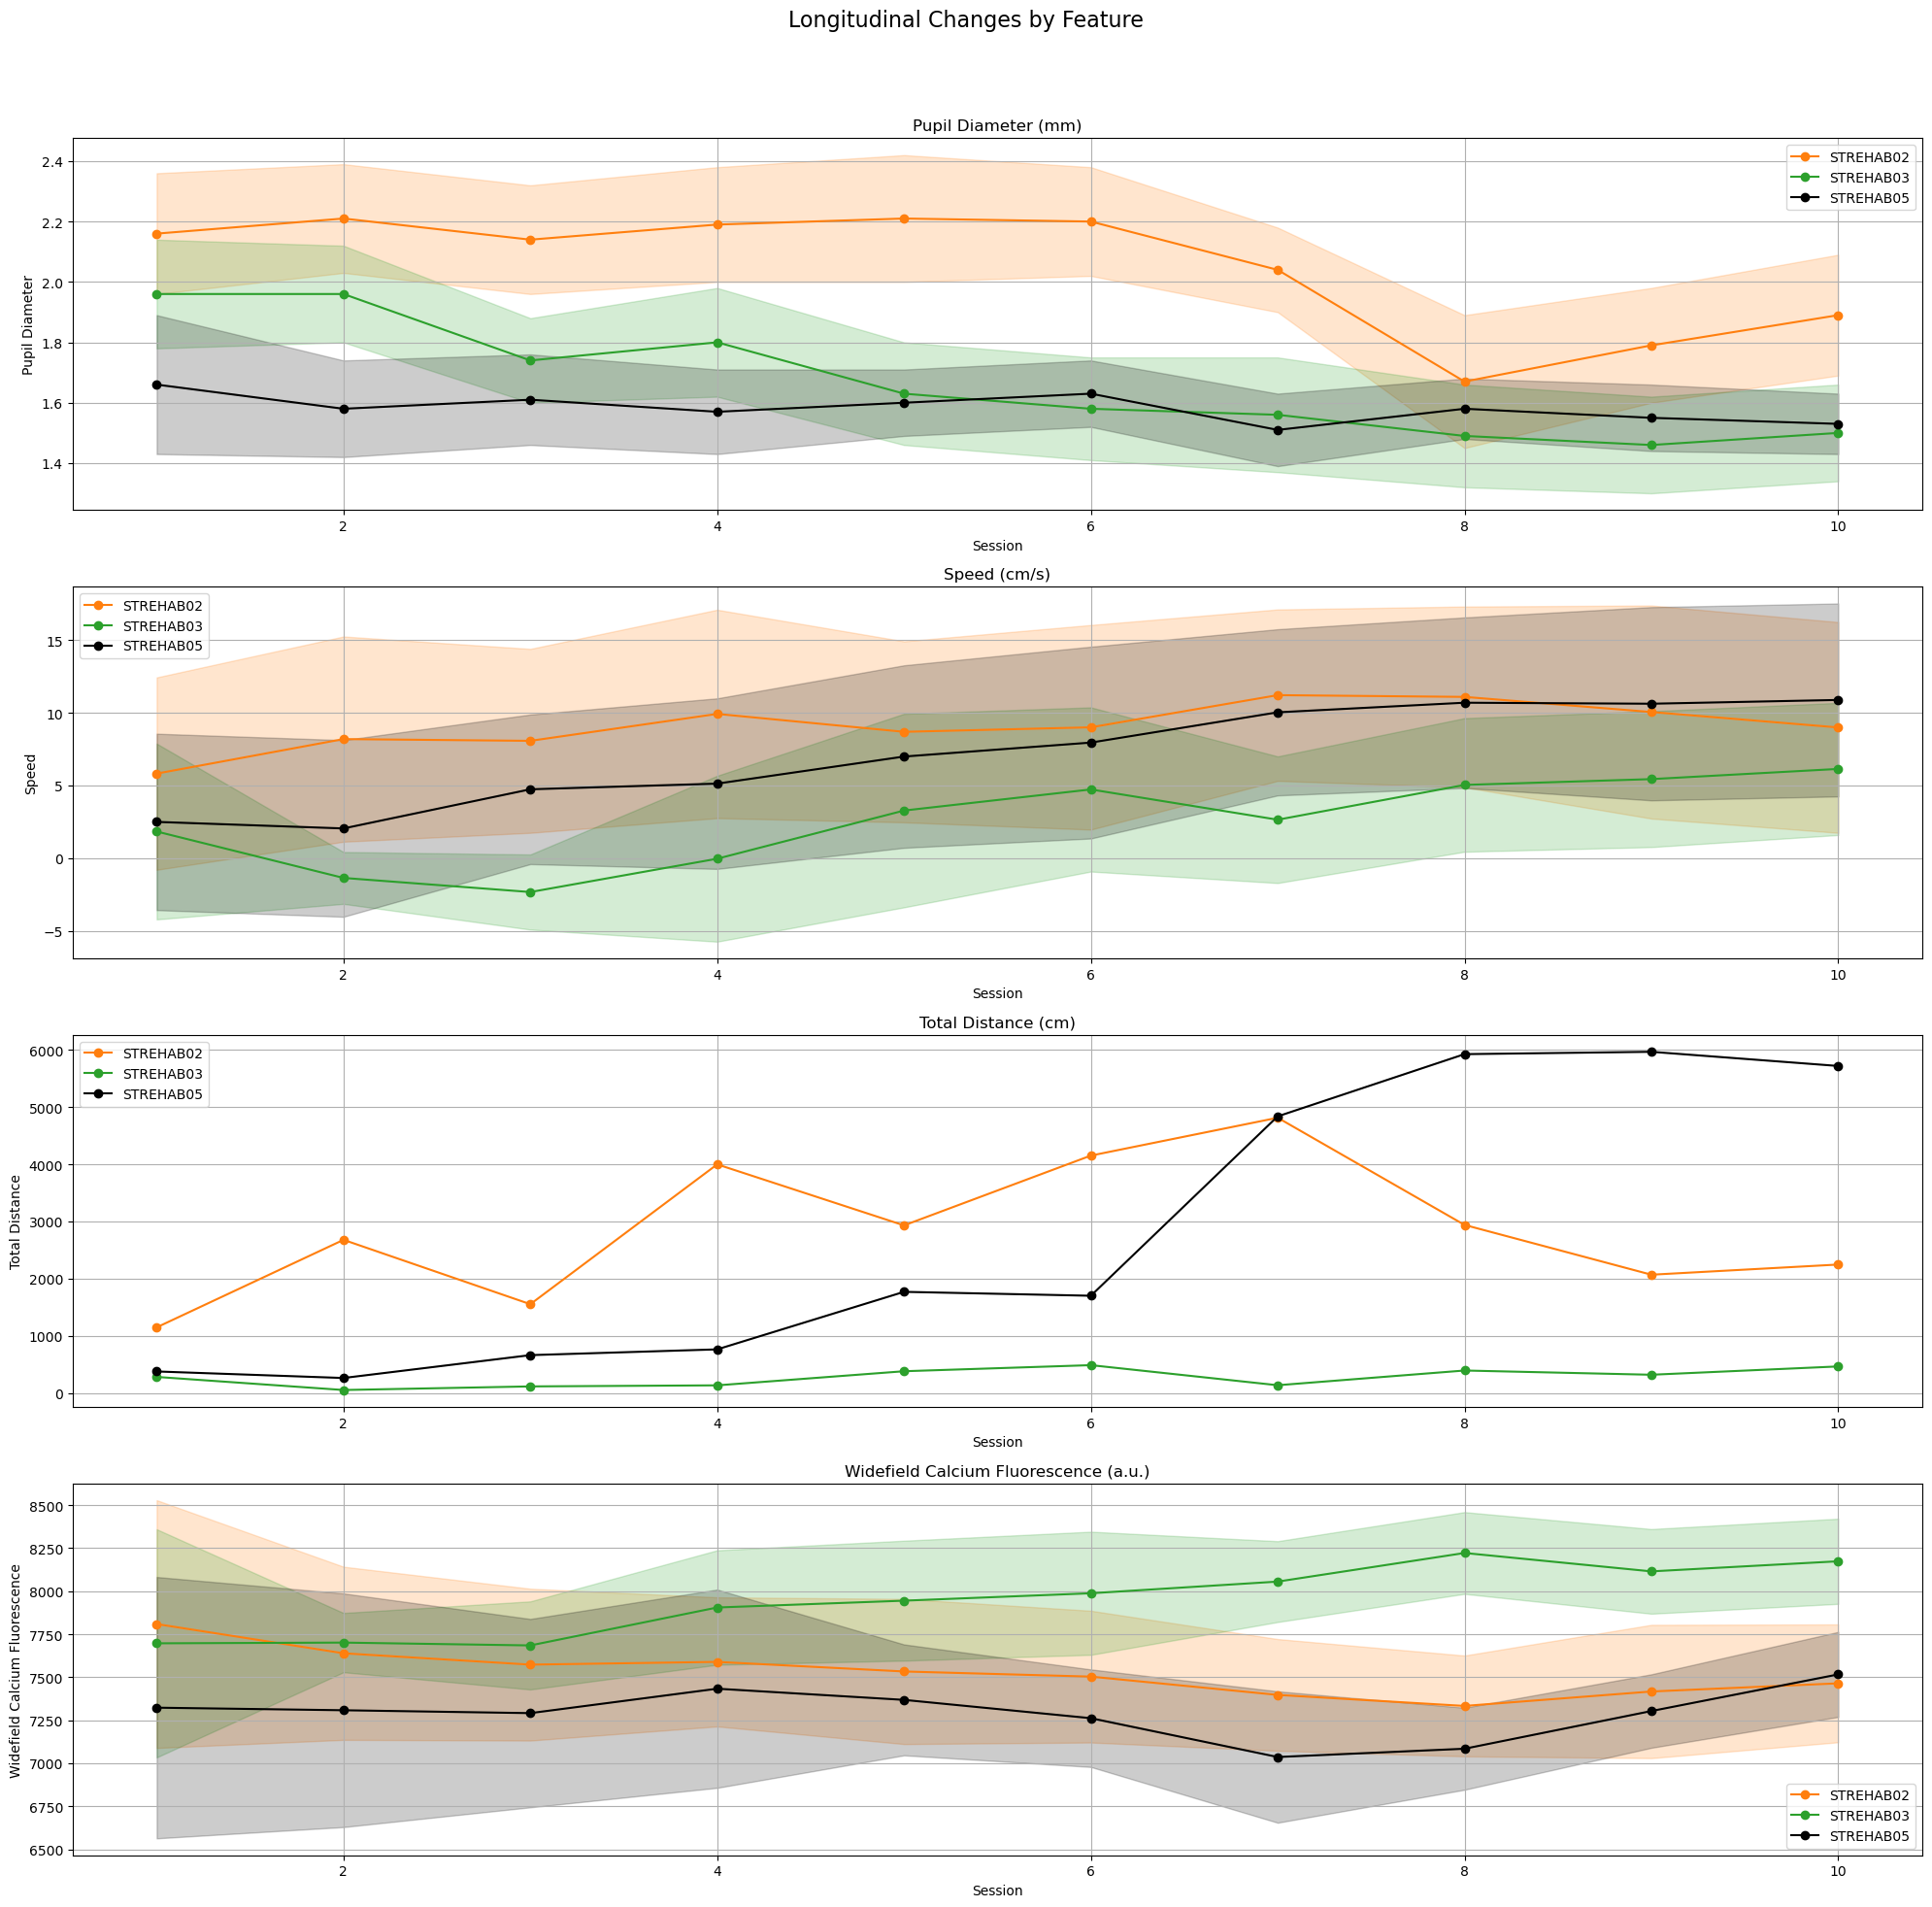

In [32]:
import matplotlib.pyplot as plt

subject_color_map = {
    'STREHAB01': 'tab:blue',
    'STREHAB02': 'tab:orange',
    'STREHAB03': 'tab:green',
    'STREHAB04': 'tab:red',
    # …add as many as you have…
}

# Cell 8 ⇒ longitudinal Matplotlib plotting via metric_map
stats_df_reset = stats_df.reset_index()
stats_df_reset['Session'] = stats_df_reset['Session'].astype(int)
subjects_unique = stats_df_reset['Subject'].unique()

n_metrics = len(metric_map)
fig, axs = plt.subplots(n_metrics, 1, figsize=(20, 5 * n_metrics))

for ax, (key, info) in zip(axs, metric_map.items()):
    mean_col = info['mean_col']
    std_col  = info['std_col']
    for subject in subjects_unique:
        df_sub = stats_df_reset[stats_df_reset['Subject'] == subject]
        c = subject_color_map.get(subject, 'black')
        ax.plot(df_sub['Session'], df_sub[mean_col],
                marker='o', linestyle='-', label=subject,
                color=c)
        if std_col:
            ax.fill_between(df_sub['Session'],
                            df_sub[mean_col] - df_sub[std_col],
                            df_sub[mean_col] + df_sub[std_col],
                            color=c, alpha=0.2)
    ax.set_title(f"{info['label']} ({info['unit']})")
    ax.set_xlabel("Session")
    ax.set_ylabel(info['label'])
    # y‐limits
    if std_col:
        lo = (stats_df_reset[mean_col] - stats_df_reset[std_col]).min()
        hi = (stats_df_reset[mean_col] + stats_df_reset[std_col]).max()
    else:
        lo, hi = stats_df_reset[mean_col].min(), stats_df_reset[mean_col].max()
    margin = 0.05 * (hi - lo)
    ax.set_ylim(lo - margin, hi + margin)
    ax.grid(True)
    ax.legend()

plt.suptitle("Longitudinal Changes by Feature", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [33]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# reuse the manual subject→color map
subject_color_map = {
    'STREHAB01': '#1f77b4',
    'STREHAB02': '#ff7f0e',
    'STREHAB03': '#2ca02c',
    'STREHAB04': '#d62728',
    # …
}
n_metrics      = len(metric_map)
subplot_titles = [f"{info['label']} Across Sessions" for info in metric_map.values()]
x_axis_label   = "Session Number"
y_axis_labels  = [f"{info['label']} ({info['unit']})" for info in metric_map.values()]

fig = make_subplots(
    rows=n_metrics, cols=1,
    shared_xaxes=True, vertical_spacing=0.08,
    subplot_titles=subplot_titles
)


for row_idx, (key, info) in enumerate(metric_map.items(), start=1):
    mean_col, std_col = info['mean_col'], info['std_col']
    for subj in subjects_unique:
        df_sub = stats_df_reset[stats_df_reset['Subject'] == subj]
        x, y = df_sub['Session'], df_sub[mean_col]
        c = subject_color_map.get(subj, '#000000')
        if std_col:
            y_low, y_hi = y - df_sub[std_col], y + df_sub[std_col]
            fig.add_trace(go.Scatter(x=x, y=y_low, mode="lines",
                                     line=dict(width=0), showlegend=False,
                                     hoverinfo="skip"),
                          row=row_idx, col=1)
            fig.add_trace(go.Scatter(x=x, y=y_hi, mode="lines", fill="tonexty",
                                     fillcolor=f"rgba({int(c[1:3], 16)},{int(c[3:5], 16)},{int(c[5:7], 16)},0.2)", 
                                     line=dict(width=0),
                                     showlegend=False, hoverinfo="skip"),
                          row=row_idx, col=1)
        fig.add_trace(go.Scatter(x=x, y=y, mode="lines+markers",
                                 name=subj, legendgroup=subj,
                                 line=dict(color=c),
                                 showlegend=(row_idx==1)),
                      row=row_idx, col=1)
    fig.update_yaxes(title_text=y_axis_labels[row_idx-1], row=row_idx, col=1)

fig.update_xaxes(title_text=x_axis_label, row=n_metrics, col=1)
fig.update_layout(
    height=300 * n_metrics, width=800,
    template="simple_white",
    legend_title_text="Subject",
    margin=dict(l=50, r=50, t=80, b=50)
)
fig.show()

In [86]:
# --- build a publishable table figure of your summary stats ---
import plotly.graph_objects as go

# round and reset index so 'Statistic' becomes a column instead of the index
stats_df = overall_stats.round(2).reset_index().rename(columns={'index': 'Statistic'})

table_fig = go.Figure(
    data=go.Table(
        header=dict(
            values=list(stats_df.columns),
            fill_color='paleturquoise',
            align='left'
        ),
        cells=dict(
            values=[stats_df[col] for col in stats_df.columns],
            fill_color='lavender',
            align='left'
        )
    )
)

table_fig.update_layout(
    title_text="Summary Statistics Across All Sessions",
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=40, b=20)
)

table_fig.show()


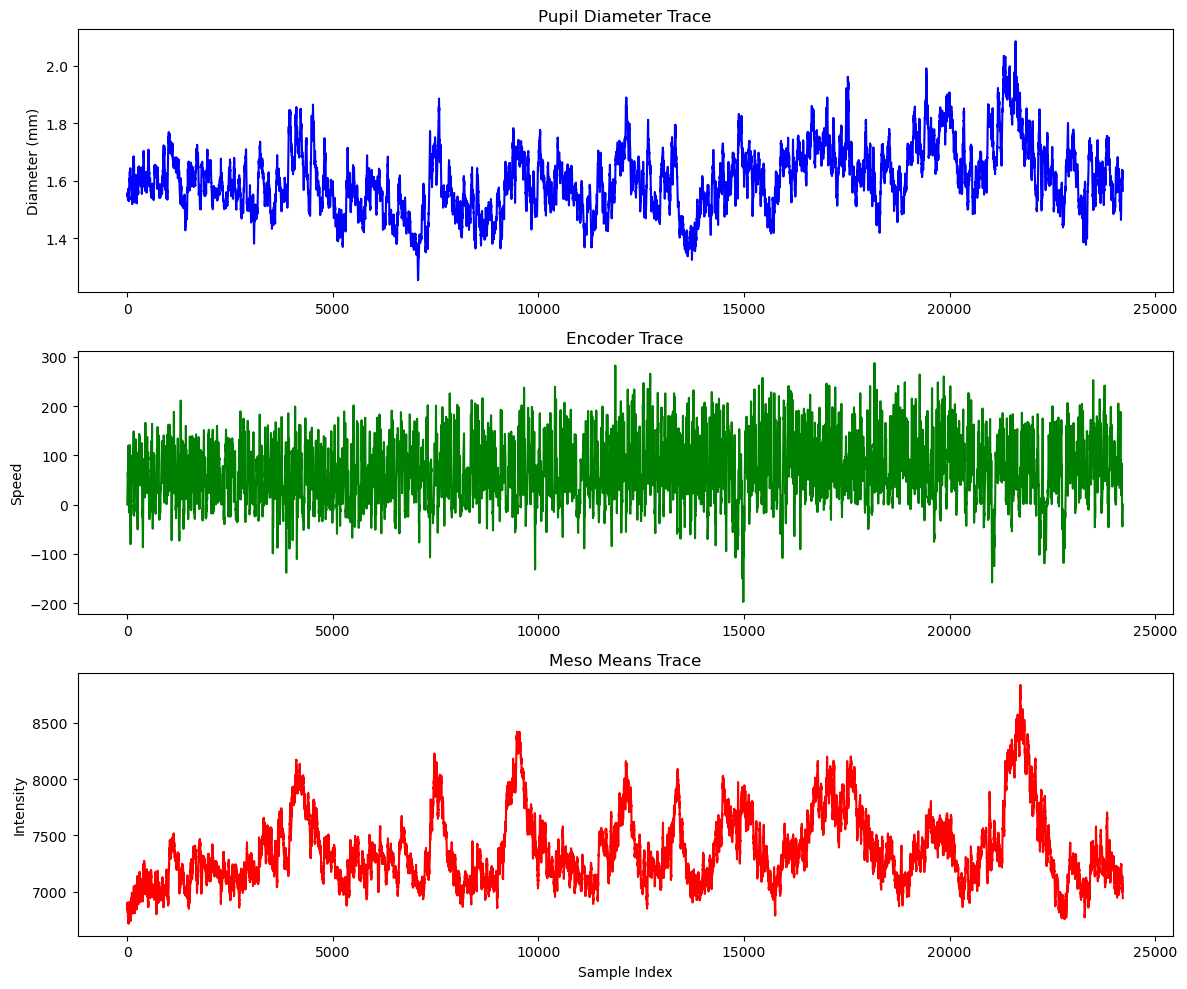

Summary Statistics for the Traces:
       Pupil Diameter       Encoder    Meso Means
count    24214.000000  24214.000000  24214.000000
mean         1.604382     69.875224   7368.284472
std          0.112414     61.824730    322.063474
min          1.254708   -197.810371   6714.640619
25%          1.527207     20.702107   7134.753621
50%          1.596728     70.516164   7298.750208
75%          1.675068    113.632644   7535.001016
max          2.085918    287.266524   8837.228039


In [ ]:
# Create a DataFrame combining the three traces.

df_traces = pd.DataFrame({
    'Pupil Diameter': pupil,
    'Encoder': encoder_interp,
    'Meso Means': meso_interp
})

# Calculate summary statistics for each trace.
summary_stats = df_traces.describe()

# Plot the three traces in separate subplots.
plt.figure(figsize=(12, 10))

# Pupil Diameter trace
plt.subplot(3, 1, 1)
plt.plot(df_traces.index, df_traces['Pupil Diameter'], color='blue')
plt.title("Pupil Diameter Trace")
plt.ylabel("Diameter (mm)")

# Encoder trace
plt.subplot(3, 1, 2)
plt.plot(df_traces.index, df_traces['Encoder'], color='green')
plt.title("Encoder Trace")
plt.ylabel("Speed")

# Meso Means trace
plt.subplot(3, 1, 3)
plt.plot(df_traces.index, df_traces['Meso Means'], color='red')
plt.title("Meso Means Trace")
plt.xlabel("Sample Index")
plt.ylabel("Intensity")

plt.tight_layout()
plt.show()

# Display summary statistics
print("Summary Statistics for the Traces:")
print(summary_stats)


In [ ]:
# Create a DataFrame combining the three traces.
df_traces = pd.DataFrame({
    'Pupil Diameter': pupil,
    'Encoder': encoder_interp,
    'Meso Means': meso_interp
})

# Calculate summary statistics for each trace.
summary_stats = df_traces.describe()

# Plot the three traces in separate subplots.
plt.figure(figsize=(12, 10))

# Pupil Diameter trace
plt.subplot(3, 1, 1)
plt.plot(df_traces.index, df_traces['Pupil Diameter'], color='blue')
plt.title("Pupil Diameter Trace")
plt.ylabel("Diameter (mm)")

# Encoder trace
plt.subplot(3, 1, 2)
plt.plot(df_traces.index, df_traces['Encoder'], color='green')
plt.title("Encoder Trace")
plt.ylabel("Speed")

# Meso Means trace
plt.subplot(3, 1, 3)
plt.plot(df_traces.index, df_traces['Meso Means'], color='red')
plt.title("Meso Means Trace")
plt.xlabel("Sample Index")
plt.ylabel("Intensity")

plt.tight_layout()
plt.show()

# Display summary statistics
print("Summary Statistics for the Traces:")
print(summary_stats)


In [85]:
import numpy as np

dataset.columns


MultiIndex([(          'meso',          'meso_tiff'),
            (       'encoder',          'timestamp'),
            (       'encoder',           'distance'),
            (       'encoder',              'speed'),
            (         'notes',         'raw_output'),
            ('session_config',         'raw_output'),
            (     'meso_meta',     'runner_time_ms'),
            (     'meso_meta',        'exposure_ms'),
            (     'meso_meta',             'Camera'),
            (     'meso_meta',     'ElapsedTime-ms'),
            (     'meso_meta',        'ImageNumber'),
            (     'meso_meta',        'Temperature'),
            (     'meso_meta', 'TimeReceivedByCore'),
            (    'pupil_meta',     'runner_time_ms'),
            (    'pupil_meta',        'exposure_ms'),
            (    'pupil_meta',             'Camera'),
            (    'pupil_meta',     'ElapsedTime-ms'),
            (    'pupil_meta',        'ImageNumber'),
            (    'pupil_meta